# Review of the discrete differential geometry formulation of surface interfaces


Previously we have investigated a wide range of curvature notions. We found that the mean normal vector curvature computed using the cotan formula is not only the best notion for curvature, but it is also exactly (subject to floating point round-off error) equal to the analytical solution of mean curvature at equilibrium: 

$$H N dA = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{i}-f_{j}\right)$$


Therefore we had a good estimate of physical curvature _in the interior domain_ since we could compute the pressure  $\Delta p=-\gamma H$ and found that is exactly equal to the hydrostatic pressure $\Delta p=-\rho g h$ at the equilibrium (Jurin) height under _any_ refinement.

Previously we have used the Gauss-Bonnet to compute the ratios between $K$ and $ k_{g}$ at a boundary vertex point:

$$
\int_{\mathcal{M}} K d A+\int_{\partial \mathcal{M}} k_{g} d s=2 \pi \chi
$$

 
We use the discrete approximition of the angle defect $ K \approx \Omega_{i} $ and computed the current ratios using the discrete Gauss-Bonnet theorem:

$$
\sum_{i \in i n t(V)} \Omega_{i}+\sum_{i \in \partial V} \kappa_{i}=2 \pi \chi
$$




Here we propose a new notion of discrete Gaussian curvature, one that matches the physical notion of cotan formula. Now, instead of using the angle defect to compute the "forces" on boundary vertices we compute:

$$
\kappa_{i, 1}:=\frac{\dot{H}_{i}}{C_{i j k}} + \sqrt{\left(\frac{\dot{H}_{i}}{C_{i j k}}\right)^{2}-\frac{\dot{K}_{i}}{C_{i j k}}}
$$

$$
\kappa_{i, 2}:=\frac{\dot{H}_{i}}{C_{i j k}} - \sqrt{\left(\frac{\dot{H}_{i}}{C_{i j k}}\right)^{2}-\frac{\dot{K}_{i}}{C_{i j k}}}
$$

and we show that, numerically, we can also recover the exact analytical Gaussian curvature by using this notion, rather than the angle defect, in the interior. This provides us with a better notion of the three-phase contact angle $\theta_p$ through the ratio of $\hat{K}_{i}=\hat{\kappa}_{i, 1} \hat{\kappa}_{i, 2}$ and the expected exact local solution for $K$.



We investigate geodisic curvatures $k_g$ on boundary of a phase interface film using the known analytical solution of the capillary rise case:
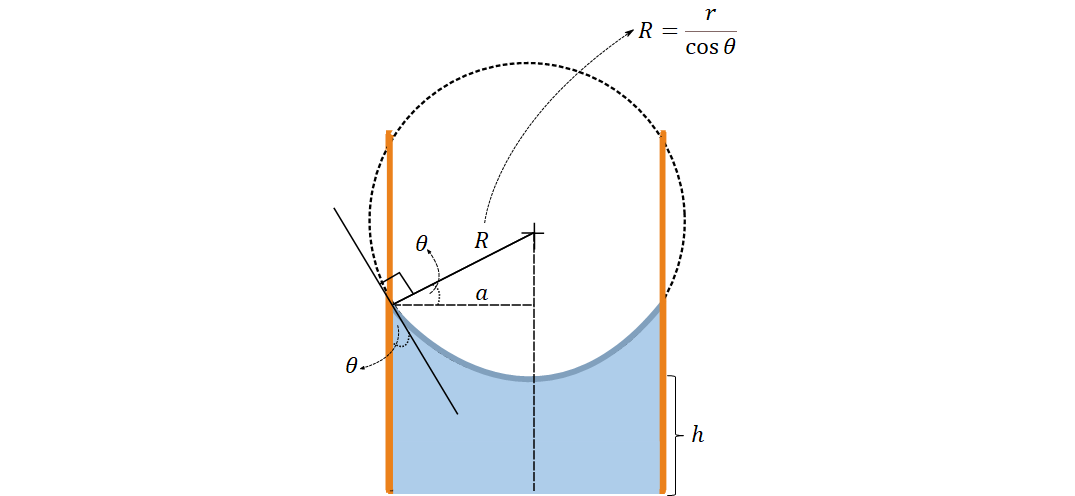

# Imports and physical parameters:

In [3]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
from ddgclib.ddgclib import *
from ddgclib.ddgclib._eos import *
from ddgclib.ddgclib._complex import *
from ddgclib.ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib.ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib.ddgclib._eos import *
from ddgclib.ddgclib._misc import *
#from ddgclib._complex import *
#from ddgclib._curvatures import * #plot_surface#, curvature
#from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
#from ddgclib._eos import *
#from ddgclib._misc import *

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Parameters from EoS:
#T_0 = 273.15 + 25  # K, initial tmeperature
#P_0 = 101.325  # kPa, Ambient pressure
#gamma = IAPWS(T_0)  # N/m, surface tension of water at 20 deg C
#rho_0 = eos(P=P_0, T=T_0)  # kg/m3, density

# Capillary rise parameters
#r = 0.5e-2  # Radius of the droplet sphere
r = 2.0  # Radius of the droplet sphere
r = 1.4e-5  # Radius of the droplet sphere
r = 1.0
#r = 0.5e-5  # Radius of the droplet sphere
theta_p = 45 * np.pi/180.0  # Three phase contact angle
#theta_p = 20 * np.pi/180.0  # Three phase contact angle
#phi = 0.0
N = 5
N = 7

# Capillary rise film

Examples of the system under different refinements:

<IPython.core.display.Javascript object>


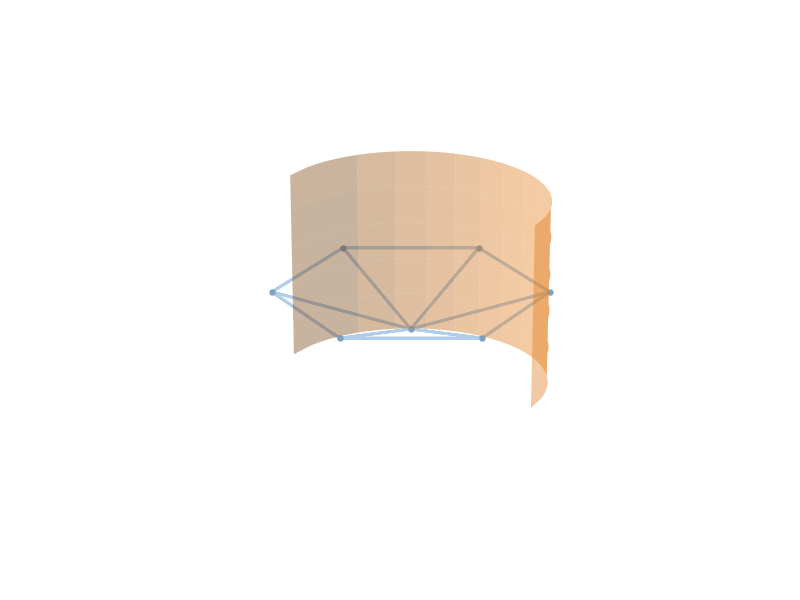

(-7.778174593052024e-06,
 7.778174593052024e-06,
 -7.778174593052024e-06,
 7.778174593052024e-06)

In [38]:
%matplotlib notebook
N = 7
fig, axes, HC = cape_rise_plot(r, theta_p, gamma, N=N, refinement=0)

axes.grid(False)

# Hide axes ticks
axes.set_xticks([])
axes.set_yticks([])
axes.set_zticks([])
plt.axis('off')

In [37]:
print(HC.V.size())

68


### We will only plot the film itself:

<IPython.core.display.Javascript object>


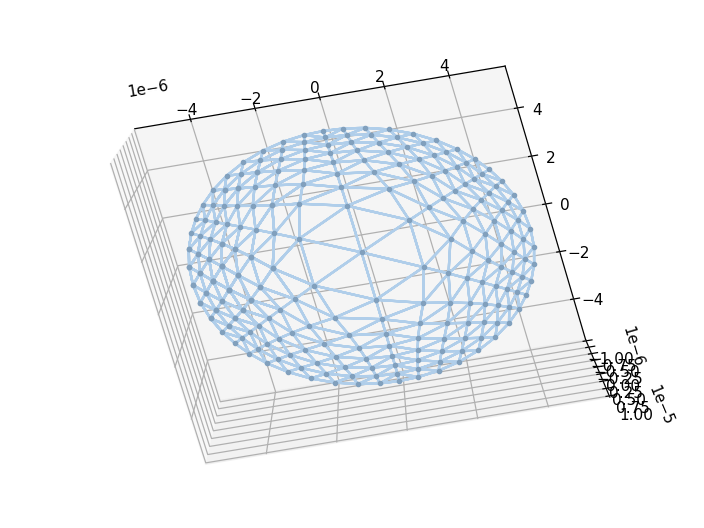

(-1e-05, 1e-05)

In [20]:
N = 7
F, nn, HC, bV, K_f, H_f = cap_rise_init_N(r, theta_p, gamma, N=N,
                                          refinement=3
                                          )
fig, axes, fig_s, axes_s = HC.plot_complex(point_color=db, line_color=lb)
axes.set_zlim(-r, 0.0)
axes.set_zlim(-2*r, 2*r)

# This is the last time you will have to look at this ugly graph

The blue lines are the new Gaussian curvature notions K_H is $\hat{K}_{i}=\sqrt{(H \cdot N/2)}$ is the and K_H 2 is $\hat{K}_{i}=\hat{\kappa}_{1} \hat{\kappa}_{2}$.

Notice it is exactly on the analytical Gaussian curvature $K_f$ under any refinement.

<IPython.core.display.Javascript object>


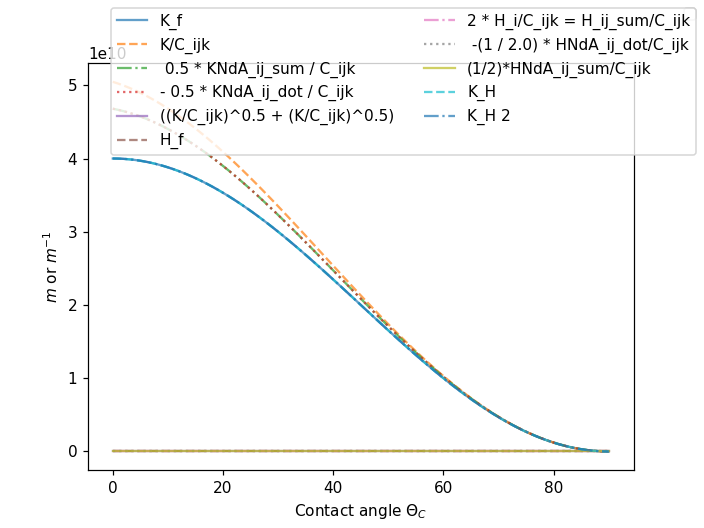

<IPython.core.display.Javascript object>


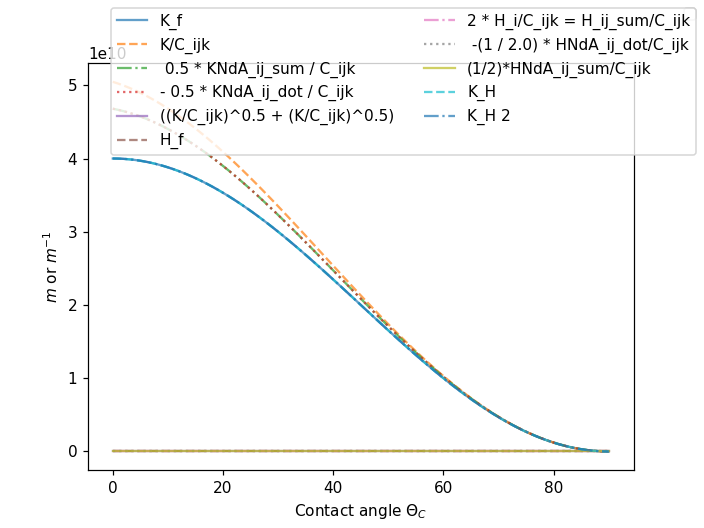

In [18]:
r = 1.4e-5
r = 0.5e-5
c_outd_list, c_outd, vdict, X = out_plot_cap_rise(N=N, r=r, gamma=gamma, refinement=1)
plot_c_outd(c_outd_list, c_outd, vdict, X)

### As we previously noted the other notions of curvature do converge to the analytical solution, but _only_ under refinement.

<IPython.core.display.Javascript object>


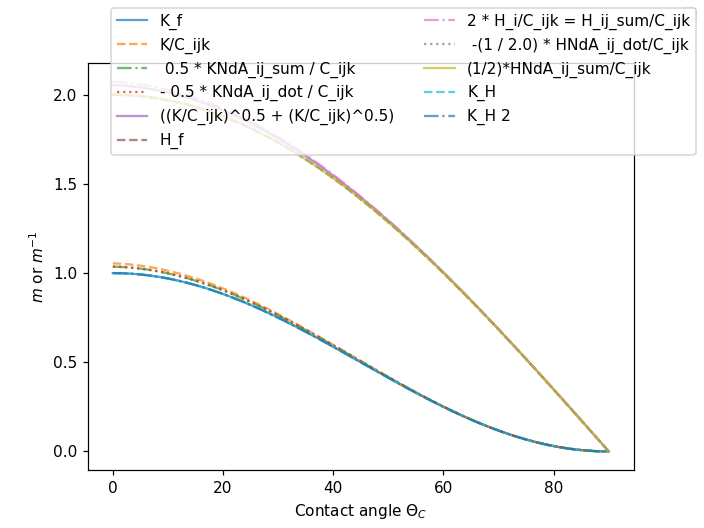

<IPython.core.display.Javascript object>


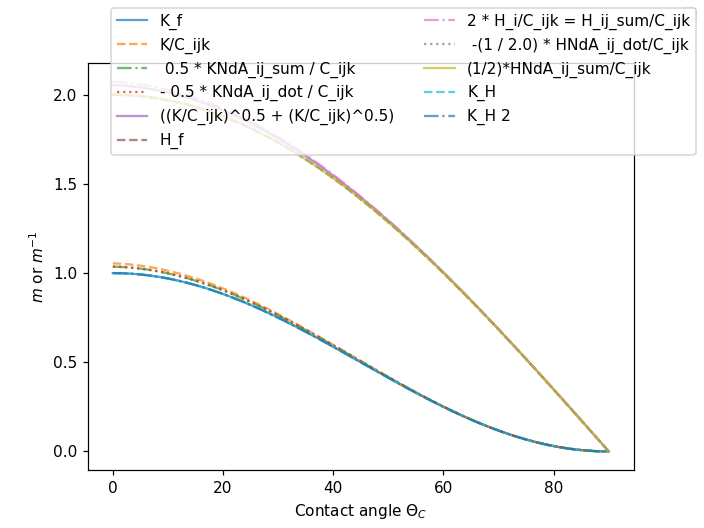

In [15]:
c_outd_list, c_outd, vdict, X = out_plot_cap_rise(N=N, r=r, gamma=gamma, refinement=3)
plot_c_outd(c_outd_list, c_outd, vdict, X)

In [ ]:
r = 1.4e-5  # Radius of the droplet sphere
#r = 0.5e-5  # Radius of the droplet sphere
theta_p = 45 * np.pi/180.0  # Three phase contact angle
#theta_p = 20 * np.pi/180.0  # Three phase contact angle

In [ ]:
F, nn, HC, bV, K_f, H_f = cap_rise_init_N(r, theta_p, gamma, N=N,
                                              refinement=1
                                              )
fig, axes, fig_s, axes_s = HC.plot_complex()
axes.set_zlim(-r, 0.0)
axes.set_zlim(-2*r, 2*r)


A patch cut out of any surface must also fullfill the Gauss-Bonnet theorem:



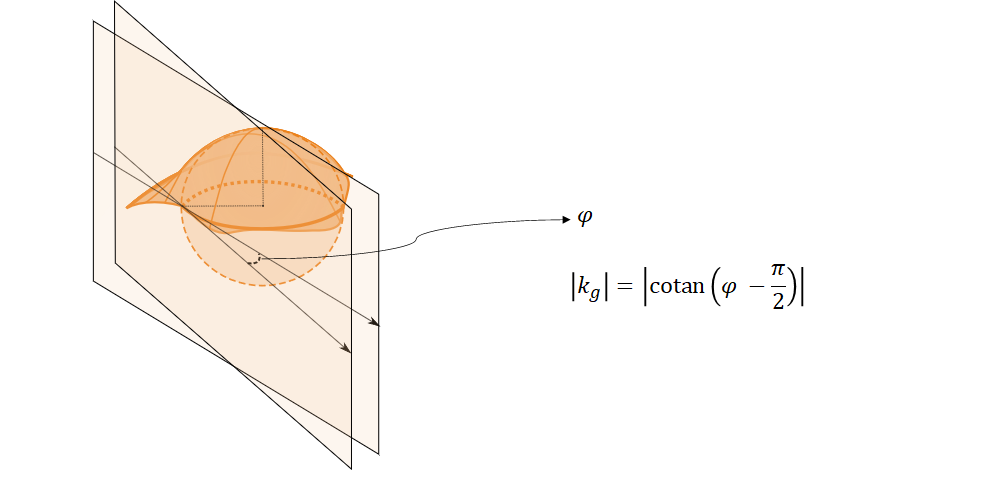

$$
\int_{\mathcal{M}} K d A+\int_{\partial \mathcal{M}} k_{g} d s=2 \pi \chi
$$

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\ddgclib\_capillary_rise.py:586: RuntimeWarning: divide by zero encountered in true_divide
  'K/C_ijk': K / C_ijk,


<IPython.core.display.Javascript object>


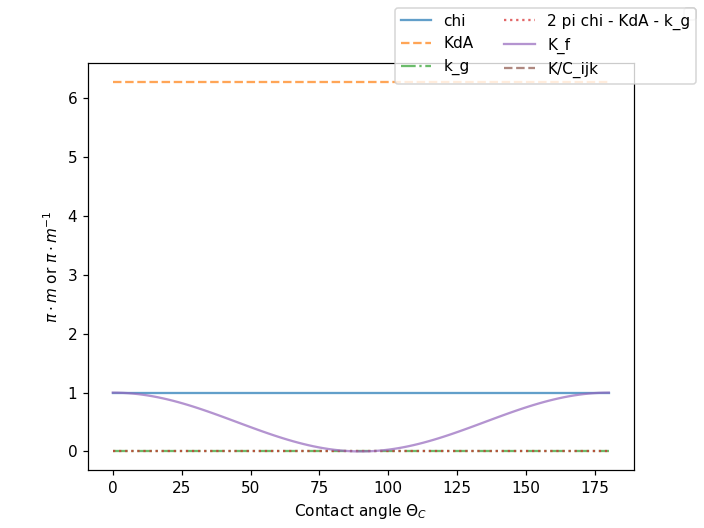

<IPython.core.display.Javascript object>


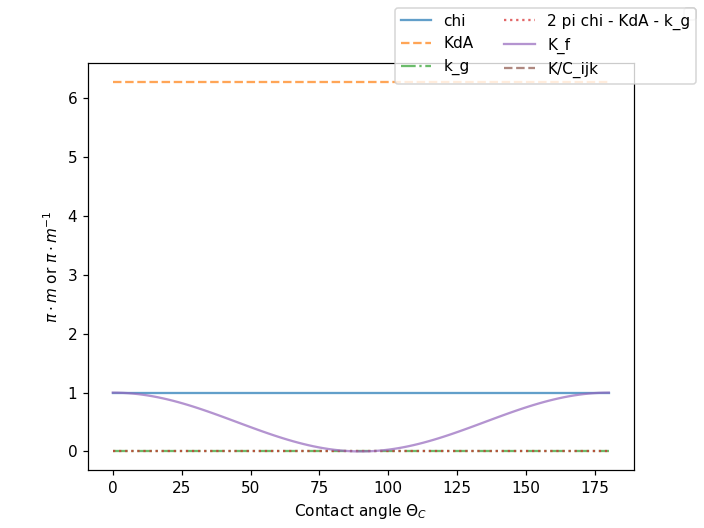

In [9]:
c_outd_list, c_outd, vdict, X = out_plot_cap_rise_boundary(N=N, r=r, refinement=2)
plot_c_outd(c_outd_list, c_outd, vdict, X, ylabel=r'$\pi \cdot  m$ or $\pi \cdot m^{-1}$')


# Important finding:

A given three-phase contact angle $\theta_p$ has _the same_ analytical Gaussian curvature $K$ at any point, regardless of the geometry and the totol Gaussian integral

In [10]:
theta_p = 45 * np.pi/180.0  # Three phase contact angle
#theta_p = 20 * np.pi/180.0  # Three phase contact angle
#phi = 0.0
N = 5
N = 7

<IPython.core.display.Javascript object>


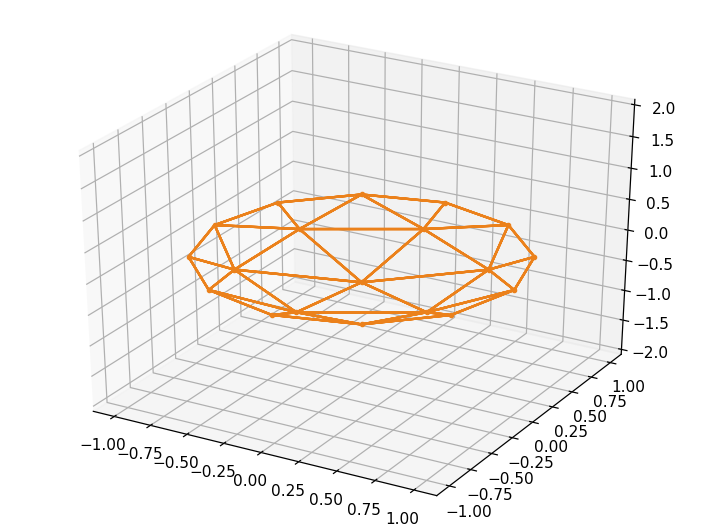

H_disc = [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356]
HNdA_i = [array([-1.11022302e-16,  1.11022302e-16,  6.82395356e-01], dtype=float64), array([-0.1583355 , -0.09141505,  0.39619695], dtype=float64), array([-0.1583355 ,  0.09141505,  0.39619695], dtype=float64), array([1.66533454e-16, 1.82830092e-01, 3.96196952e-01], dtype=float64), array([0.1583355 , 0.09141505, 0.39619695], dtype=float64), array([ 0.1583355 , -0.09141505,  0.39619695], dtype=float64), array([-2.77555756e-16, -1.82830092e-01,  3.96196952e-01], dtype=float64)]
HNdA_ij = [array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.80924066,  0.22746512],
       [-0.70082297,  0.40462033,  0.22746512],
       [-0.70082297, -0.40462033,  0.22746512],
       [ 0.        , -0.80924066,  0.22746512],
       [ 0.70082297, -0.40462033,  0.22746512],
       [ 0.70082297,  0.40462033,  0.22746512]], dtype=float64), array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
      

In [7]:
F, nn, HC, bV, K_f, H_f = cap_rise_init_N(r, theta_p, gamma, N=N,
                                          refinement=1
                                          )
fig, axes, fig_s, axes_s = HC.plot_complex()
axes.set_zlim(-r, 0.0)
axes.set_zlim(-2*r, 2*r)

R = r / np.cos(theta_p)
K_f = (1 / R) ** 2
H_f = 2 / R  # 2 / R

# Compute the interior mean normal curvatures

(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
 K_H_2) = int_curvatures(HC, bV, r, theta_p, printout=True)
print('-')
print(f'=' * len('Discrete (New):'))
print(f'K_H_2 - K_f = {K_H_2 - K_f}')
print(f'HNdA_ij_dot_hnda_i  - H_f = {HNdA_ij_dot_hnda_i - H_f}')
# Compute the old discrete Gauss_Bonnet values
print(f'=' * len('Discrete (Angle defect):'))
print(f'Discrete (Angle defect):')
print(f'='*len('Discrete (Angle defect)::'))
chi, KdA, k_g = Gauss_Bonnet(HC, bV, print_out=True)

print(f'=' * len('Analytical:'))
print(f'Analytical:')
print(f'='*len('Analytical:'))
H_f, K_f, dA, k_g_f, dC = analytical_cap(r, theta_p)
print(f'Area of spherical cap = {dA}')
print(f'H_f  = {H_f }')    # int K_f dA
print(f'K_f  = {K_f }')    # int K_f dA
print(f'K_f dA = {K_f * dA}')    # int K_f dA
# Values for r =1
#k_g_f = np.cos(theta_p) / np.sin(theta_p)  # The geodisic curvature at a point
#b_S_length = 2 * np.pi * np.sin(theta_p)  # The length of a boundary of a spherical cap

print(f'k_g  = {k_g_f }')  # int
print(f'k_g * dC = {k_g_f * dC  }')  # int
print(f'K_f dA + int k_g_f dC = { K_f * dA + k_g_f  * dC }')
print(f'LHS - RHS = { K_f * dA + k_g_f  * dC   - 2 * np.pi * np.array(chi)  }')

print(f'k_g_f/K_f = {k_g_f/K_f}')
print(f'k_g_f * dC/K_f dA = {(k_g_f * dC )/(K_f * dA)}')
print(f'Total vertices: {HC.V.size()}')

if 0:
    for v, kh2, hnda in zip(int_V, K_H_2, HNdA_ij_dot_hnda_i):
        print(f'-')
        print(f'v.x = {v.x}')
        print(f'K_H_2 - K_f = {kh2 - K_f}')
        print(f'HNdA_ij_dot_hnda_i - H_f = {hnda- H_f}')

    print(v.x_a)
    print(type(v.x_a[0]))

print(f'='*100)
print(f'=')
print(f'=')
print(f'-')
dp_exact = gamma * (2 / R)
h = 2 * gamma * np.cos(theta_p) / (rho * g * r)
print(f'dp_exact = {dp_exact}')
print(f'rho * g * h = {rho * g * h}')
print(f'h (Jurin) = { h} m')
print(f'-')

v0 = HC.V[(0.0, 0.0, R * np.sin(theta_p) - R)]
print(f'HNda_v_cache[v0.x] = {HNda_v_cache[v0.x]}')
hnda_ij = HNda_v_cache[v0.x]
hnda_i = 0.5 * np.sum(hnda_ij, axis=0) / C_ijk_v_cache[v0.x]
print(f'hnda_i = {hnda_i}')
print(f'dp_v0 = {gamma * hnda_i}')
print(f'dp_exact - dp_v0 = {dp_exact - gamma * hnda_i[2]}')
print(f'-')
for vn in v0.nn:
    print(f'v0.x = {v0.x}')
    print(f'vn.nn = {vn.x}')
    hnda_ij = HNda_v_cache[vn.x]

    hnda_i = 0.5 * np.sum(hnda_ij, axis=0) / C_ijk_v_cache[vn.x]

    N_f0 = np.array([0.0, 0.0, R * np.sin(theta_p)]) - vn.x_a  # First approximation
    N_f0 = normalized(N_f0)[0]
    print(f'hnda_i = {hnda_i}')
    print(f'N_f0i = {N_f0}')
    print(f'hnda_i = {np.sum(hnda_i)}')

    #np.sum(np.dot(hnda_i, N_f0), axis=0)
    hnda_dot_i = 0.5 * np.sum(np.dot(HNda_v_cache[vn.x], N_f0),
                              axis=0) / C_ijk_v_cache[vn.x]
    print('- dot:')
    print(f'hnda_dot_i = {hnda_dot_i}')
    break  # Just test the first neighbour

print(f'v0.x[2] =  {v0.x[2]}')
print(f'vn.x[2] =  {vn.x[2]}')
print(f'vn.x[2] - v0.x[2] = {vn.x[2] - v0.x[2]}')
height = h + (vn.x[2] - v0.x[2])
print(f'height =  {height} m')
#print(f;)
rhogh = rho * g * height
print(f'rho * g * height = {rhogh} Pa')

if 0: # This sucks:
    print('-')
    print('sum')
    dp_v1 = gamma * np.sum(hnda_i)
    print(f'dp_v1 = {dp_v1} Pa')
    print(f'rho * g * h - dp_v1 = {rhogh - dp_v1} Pa')

    print('-')
    print('sum')
    dp_v1 = gamma * np.dot(hnda_i, N_f0)
    print(f'dp_v1 = {dp_v1} Pa')
    print(f'rho * g * h - dp_v1 = {rhogh - dp_v1} Pa')
    # Equlibrium heighjt
    eq_height = dp_v1 / (rho * g)
    print(f'eq_height = dp_v1 / (rho * g) = {eq_height} m')
    print(f'eq_height = dp_v1 / (rho * g - height = {eq_height - height} m')

print('-')
print('dot')
dp_v1 = gamma * hnda_dot_i #np.dot(hnda_dot_i, N_f0)
print(f'dp_v1 = {dp_v1} Pa')
print(f'rho * g * h - dp_v1 = {rhogh - dp_v1} Pa')
# Equlibrium heighjt
eq_height = dp_v1 / (rho * g)
print(f'eq_height = dp_v1 / (rho * g) = {eq_height} m')
print(f'eq_height = dp_v1 / (rho * g - height = {eq_height - height} m')

print('Boundaries:')
for v in bV:
    print(f'v.x = {v.x}')
    for vn in v.nn:
        if not (vn in bV):
            print(f'K_H_cache[vn.x] = {K_H_cache[vn.x]}')
    break